In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

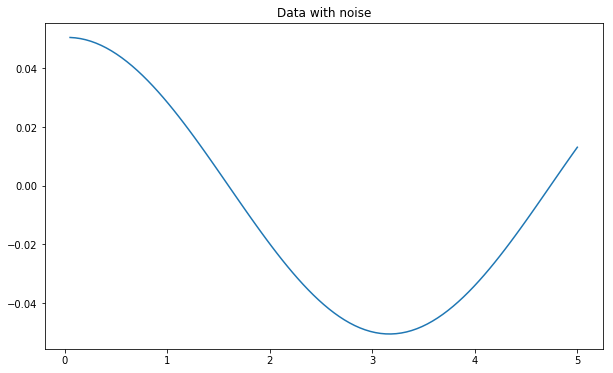

In [37]:
pts=100 
noisescale=.1
x=np.linspace(0,5,num=pts)
B0=1
B1=2
B2=3
B3=4
#B4=5
#B5=6

yactual = np.sin(x) #+ 0.5* np.sin(x+3)

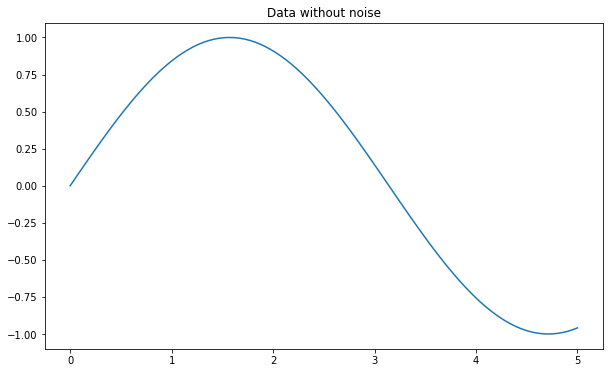

In [51]:
pyplot.figure(figsize=(10,6))
pyplot.plot(x, yactual)
pyplot.title("Data without noise")

In [48]:
dy = np.diff(yactual)

for i in range(0, len(dy)-1):
    if (dy[i] > 0 and dy[i+1] <= 0) or (dy[i] <= 0 and dy[i+1] > 0):
        print '\npoint '+ str(i)
        print yactual[i]
        print x[i]
        print dy[i]


point 30
0.9984522269003895
1.5151515151515151

point 92
-0.9978277779792126
4.646464646464646


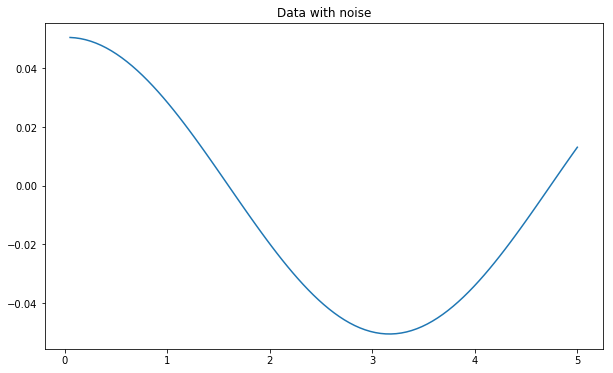

In [52]:
pyplot.figure(figsize=(10,6))
pyplot.plot(x[1:], dy)
pyplot.title("Data with noise")

In [54]:
yactual = np.sin(x) #+ 0.5* np.sin(x+3)
dydy = np.diff(dy)

for i in range(0, len(dy)-2):
    if (dydy[i] >= 0 and dydy[i+1] < 0) or (dydy[i] <= 0 and dydy[i+1] > 0):
        print '\npoint '+ str(i)
        print yactual[i]
        print x[i]
        print dy[i]
        print dydy[i]


point 61
0.06074714891786741
3.080808080808081
-0.05046780767733271
-2.621456079822393e-05


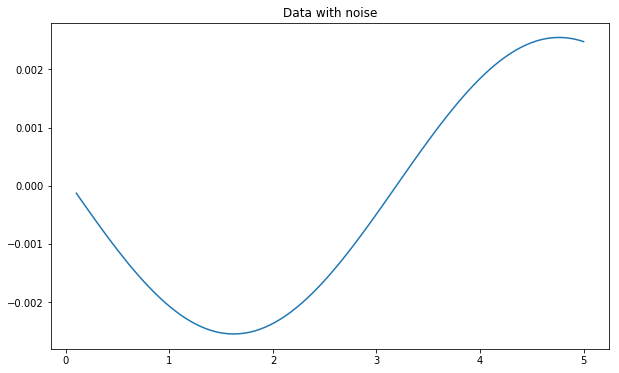

In [56]:
pyplot.figure(figsize=(10,6))
pyplot.plot(x[2:], dydy)
pyplot.title("Data with noise")

In [72]:
yactual = np.sin(x) #+ 0.5* np.sin(x+3)
dy = np.diff(yactual)
dydy = np.diff(dy)

x_list = []
y_list = []
dy_list = []
dydy_list = []

for i in range(0, len(yactual)-2):
    x_list.append(x[i])
    y_list.append(yactual[i])
    dy_list.append(dy[i])
    dydy_list.append(dydy[i])
    
all_lists = pd.DataFrame(
    {'x':x_list,
     'y': y_list,
     'dy': dy_list,
     'dydy': dydy_list}
)

   
# if (dy[i] > 0 and dy[i+1] <= 0) or (dy[i] <= 0 and dy[i+1] > 0):
# if (dydy[i] >= 0 and dydy[i+1] < 0) or (dydy[i] <= 0 and dydy[i+1] > 0):
all_lists

,dy,dydy,x,y
0,0.050484,-0.000129,0.000000,0.000000
1,0.050355,-0.000257,0.050505,0.050484
2,0.050098,-0.000385,0.101010,0.100838
3,0.049713,-0.000512,0.151515,0.150936
4,0.049201,-0.000637,0.202020,0.200649
5,0.048564,-0.000761,0.252525,0.249850
6,0.047803,-0.000883,0.303030,0.298414
7,0.046920,-0.001003,0.353535,0.346217
8,0.045917,-0.001120,0.404040,0.393137
9,0.044798,-0.001234,0.454545,0.439054


In [ ]:
# thres *= np.max(y) - np.min(y)

# find the peaks by using the first order difference
 dy = np.diff(y)
# peaks = np.where((np.hstack([dy, 0.]) < 0.)
#                  & (np.hstack([0., dy]) > 0.)
#                  & (y > thres))[0]


In [16]:
from scipy.signal import savgol_filter

In [ ]:
savgol_filter()